product 	The product being reviewed. (String)

helpful_count	The number of people who found the review helpful. (Integer)

total_comments	The total number of comments on the review. (Integer)

url	The URL of the review post. (String)

review_country	The country from which the review was posted. (String)

reviewed_at	The date and time of the review submission. (DateTime)

review_text	The text of the review. (String)

review_rating	The rating given to the product by the reviewer. (Integer)

product_company	The company that manufactured the product. (String)

profile_name	The name of the reviewer. (String)

review_title	The title of the review. (String)

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
pd.set_option('display.width', 500)

In [2]:
df = pd.read_csv("DataDNA March 2023.csv")

In [3]:
df.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI


In [4]:
df.columns

Index(['index', 'product', 'helpful_count', 'total_comments', 'url', 'review_country', 'reviewed_at', 'review_text', 'review_rating', 'product_company', 'profile_name', 'review_title'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            5010 non-null   int64 
 1   product          5010 non-null   object
 2   helpful_count    5010 non-null   object
 3   total_comments   5010 non-null   int64 
 4   url              5010 non-null   object
 5   review_country   5010 non-null   object
 6   reviewed_at      5010 non-null   object
 7   review_text      5007 non-null   object
 8   review_rating    5010 non-null   object
 9   product_company  5010 non-null   object
 10  profile_name     5010 non-null   object
 11  review_title     5008 non-null   object
dtypes: int64(2), object(10)
memory usage: 469.8+ KB


In [6]:
df.isnull().sum()

index              0
product            0
helpful_count      0
total_comments     0
url                0
review_country     0
reviewed_at        0
review_text        3
review_rating      0
product_company    0
profile_name       0
review_title       2
dtype: int64

In [7]:
df.fillna('Nil', inplace=True)

In [8]:
df["product"].unique()

array(['Apple iPhone XR (64GB) - Black'], dtype=object)

In [9]:
df.review_country.unique()

array([' India '], dtype=object)

In [10]:
df[df['review_text'] == 'NOTE:']

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
10,10,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."


In [11]:
df["review_text"].unique()

array(['NOTE:',
       "Very bad experience with this iPhone xr phone. Back camera found defective and non functional. Amazon is very careless. I haven't got any response on confirmation for replacing. I am just hanging with a damaged piece worth of more than 91000 rupees.",
       'Amazing phone with amazing camera coming from iPhone 7 plus great service from amazon',
       ..., 'Dhamaka', 'Goodbye', 'Superbb'], dtype=object)

In [12]:
df["review_rating"].unique()

array(['3.0 out of 5 stars', '1.0 out of 5 stars', '5.0 out of 5 stars',
       '4.0 out of 5 stars', '2.0 out of 5 stars'], dtype=object)

In [13]:
df["review_rating"] = df["review_rating"].str.replace(' out of 5 stars', '')


In [14]:
df["review_rating"].unique()

array(['3.0', '1.0', '5.0', '4.0', '2.0'], dtype=object)

In [15]:
# Product Scores
fig = px.histogram(df, x="review_rating", category_orders={"review_rating": ["1.0", "2.0", "3.0", "4.0", "5.0"]})
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product rating')
fig.show()

From here, we can see that most of the customer rating is positive. This leads me to believe that most reviews will be pretty positive too, which will be analyzed in a while.

Now, we can create some wordclouds to see the most frequently used words in the reviews.

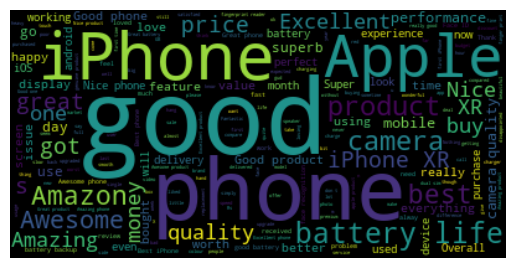

In [16]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.review_text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

Some popular words that can be observed here include “good”, “Awesome”, “best”, "Amazing" and “Amazon”. These words are mostly positive, also indicating that most reviews in the dataset express a positive sentiment.

### Classifying Texts

We will classify reviews into “positive” and “negative”.

Positive reviews will be classified as +1, and negative reviews will be classified as 0.

We will classify all reviews with ‘Score’ > 3 as +1, indicating that they are positive.

All reviews with ‘Score’ < 3 will be classified as 0. Reviews with ‘Score’ = 3 will be dropped, because they are neutral. Our model will only classify positive and negative reviews.

In [17]:
df['review_rating'] = df['review_rating'].astype(str).astype(float)

In [18]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['review_rating'] != 3.0]
df['sentiment_val'] = df['review_rating'].apply(lambda rating : +1 if rating > 3 else 0)

In [19]:
df.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,sentiment_val
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,0
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0,Apple,A,Happy with the purchase,1
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,0
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,1
5,5,Apple iPhone XR (64GB) - Black,313 people found this helpful,2,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-04-22,I was delivered a phone that did not work imme...,1.0,Apple,Anand S Prasad,Never purchase a phone online.,0


### More Data Analysis

Now that we have classified tweets into positive and negative, let’s build wordclouds for each!

First, we will create two data frames — one with all the positive reviews, and another with all the negative reviews.

In [20]:
# split df - positive and negative sentiment:
positive = df[df['sentiment_val'] == 1]
negative = df[df['sentiment_val'] == 0]

### Wordcloud — Positive Sentiment

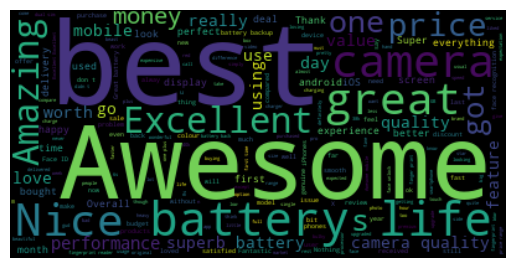

In [21]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good", "iPhone", "phone", "product", "Amazon", "Apple", "working", "XR", "buy"]) 
## good was removed because they were included in negative sentiment

pos = " ".join(review for review in positive.review_text)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.savefig('wordcloud31.png')
plt.axis("off")
plt.show()

### Wordcloud — Negative Sentiment

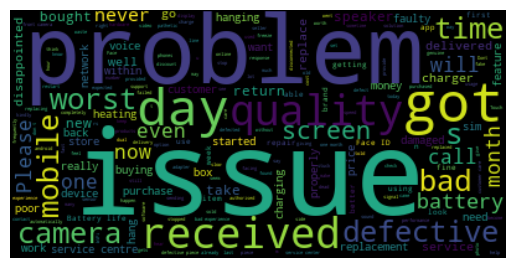

In [22]:
neg = " ".join(review for review in negative.review_text)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [23]:
df['sentiment'] = df['sentiment_val'].replace({0 : 'negative'})
df['sentiment'] = df['sentiment'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentiment")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [24]:
df.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,sentiment_val,sentiment
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,0,negative
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0,Apple,A,Happy with the purchase,1,positive
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,0,negative
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,1,positive
5,5,Apple iPhone XR (64GB) - Black,313 people found this helpful,2,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-04-22,I was delivered a phone that did not work imme...,1.0,Apple,Anand S Prasad,Never purchase a phone online.,0,negative


### Building the Model

This model will take reviews in as input. It will then come up with a prediction on whether the review is positive or negative.

This is a classification task, so we will train a simple logistic regression model to do it.

In [25]:
#we need to remove all punctuation from the data

def remove_punctuation(review_text):
    final = "".join(u for u in review_text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final

df['review_text'] = df['review_text'].apply(remove_punctuation)
#df = df.dropna(subset=['review_title'])
df['review_title'] = df['review_title'].apply(remove_punctuation)

Split the Dataframe

The new data frame should only have two columns — “Review_title” (the review text data), and “sentiment_val” (the target variable).

In [26]:
dfNew = df[['review_title','sentiment_val']]
dfNew.head()

,review_title,sentiment_val
1,Don't buy iPhone xr from Amazon,0
2,Happy with the purchase,1
3,Amazon is not an apple authorised reseller Ple...,0
4,Excellent Battery life and buttery smooth UI,1
5,Never purchase a phone online,0


We will now split the data frame into train and test sets. 80% of the data will be used for training, and 20% will be used for testing.

In [27]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

### Create a bag of words
Next, we will use a count vectorizer from the Scikit-learn library.

This will transform the text in our data frame into a bag of words model, which will contain a sparse matrix of integers. The number of occurrences of each word will be counted and printed.

We will need to convert the text into a bag-of-words model since the logistic regression algorithm cannot understand text.

In [28]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['review_title'])
test_matrix = vectorizer.transform(test['review_title'])

In [29]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [30]:
#Split target and independent variables
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment_val']
y_test = test['sentiment_val']

In [31]:
#Fit model on data
lr.fit(X_train,y_train)

LogisticRegression()

In [32]:
#Make predictions
predictions = lr.predict(X_test)

We have successfully built a simple logistic regression model, and trained the data on it. We also made predictions using the model.

### Testing the model

In [33]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 48,  18],
       [ 43, 948]], dtype=int64)

In [34]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.53      0.73      0.61        66
           1       0.98      0.96      0.97       991

    accuracy                           0.94      1057
   macro avg       0.75      0.84      0.79      1057
weighted avg       0.95      0.94      0.95      1057



The overall accuracy of the model on the test data is around 94%, which is pretty good considering we didn’t do any feature extraction or much preprocessing.